In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
#loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
#preprocessing the dataset
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

###Convolutional Neural Network (CNN) details:

####A. Input Features Matrix Dimension: (28, 28, 1)

####B. First Convolutional Layer:
1. Filter: Size=(3, 3)
2. Feature map size: After the Convolutional Layer: 14x14x32
3. Stride: Size=(2, 2)
4. Padding: 'same' (zero padding)
3. Activation Function: ReLU

####C. Pooling Layer:
1. Type: Max pooling
2. Size= (2, 2)
3. Feature map size: After the Max Pooling Layer: 7x7x32

####D. Flatten Layer: Flattens 2D feature maps to 1D vector
####E. First Fully Connected Neural Network (Dense Layer):
1. Size= 128 units
2. Activation Function: ReLU

####F. Output Dense Layer:
1. Size= 10 units
2. Activation Function: Softmax

In [5]:
#creating a CNN model with different strides
cnn = Sequential([
    Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu', input_shape=(28, 28, 1), name='convLayer'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [6]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convLayer (Conv2D)          (None, 14, 14, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 7, 7, 32)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 128)               200832    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 202442 (790.79 KB)
Trainable params: 202442 (790.79 KB)
Non-trainable params: 0 (0.00 Byte)
________________

In [7]:
#compiling the model
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
#training the model
#set 1 epoch for a quick demo
cnn.fit(x_train, y_train, epochs=1, batch_size=128, validation_split=0.1)

422/422 [==============================] - 11s 23ms/step - loss: 0.3649 - accuracy: 0.8974 - val_loss: 0.1302 - val_accuracy: 0.9633


In [9]:
#evaluating the model
test_loss, test_acc = cnn.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.1473 - accuracy: 0.9563
Test accuracy: 0.9563000202178955


In [10]:
#modelling to extract the output of the convolutional layer
convLayerModel = Model(inputs=cnn.input, outputs=cnn.get_layer('convLayer').output)

In [12]:
#getting a sample input image
sample_image = x_test[0].reshape(1, 28, 28, 1)

In [13]:
sample_image

array([[[[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ]],

        [[0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         [0.        ],
         

In [14]:
#getting the feature maps
feature_maps = convLayerModel.predict(sample_image)

1/1 [==============================] - 0s 73ms/step


In [15]:
feature_maps

array([[[[0.05431351, 0.05605284, 0.0227503 , ..., 0.014242  ,
          0.        , 0.03620338],
         [0.05431351, 0.05605284, 0.0227503 , ..., 0.014242  ,
          0.        , 0.03620338],
         [0.05431351, 0.05605284, 0.0227503 , ..., 0.014242  ,
          0.        , 0.03620338],
         ...,
         [0.05431351, 0.05605284, 0.0227503 , ..., 0.014242  ,
          0.        , 0.03620338],
         [0.05431351, 0.05605284, 0.0227503 , ..., 0.014242  ,
          0.        , 0.03620338],
         [0.05431351, 0.05605284, 0.0227503 , ..., 0.014242  ,
          0.        , 0.03620338]],

        [[0.05431351, 0.05605284, 0.0227503 , ..., 0.014242  ,
          0.        , 0.03620338],
         [0.05431351, 0.05605284, 0.0227503 , ..., 0.014242  ,
          0.        , 0.03620338],
         [0.05431351, 0.05605284, 0.0227503 , ..., 0.014242  ,
          0.        , 0.03620338],
         ...,
         [0.05431351, 0.05605284, 0.0227503 , ..., 0.014242  ,
          0.        , 0.0

(-0.5, 27.5, 27.5, -0.5)

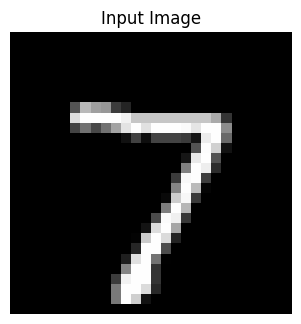

In [17]:
#plotting the input image
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(sample_image[0, :, :, 0], cmap='gray')
plt.title('Input Image')
plt.axis('off')

<ipython-input-18-72098df1da70>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6, 6, i+1)


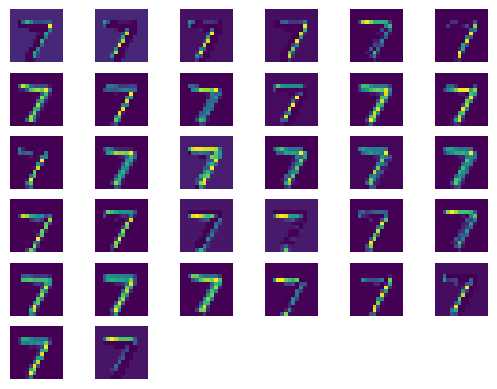

In [18]:
#plotting the feature maps
plt.subplot(1, 2, 2)
plt.title('Feature Maps')
for i in range(feature_maps.shape[-1]):
    plt.subplot(6, 6, i+1)
    plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
    plt.axis('off')

plt.show()